In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rocketpy import Function, LiquidMotor, MassFlowRateBasedTank, UllageBasedTank, MassBasedTank, Fluid

# Tank Classes

In [49]:
LiquidN2O = Fluid(name="Liquid Nitrous Oxide", density=855, quality=1)
VapourN2O = Fluid(name="Vapour Nitrous Oxide", density=101, quality=0)

N2O_flow_tank = MassFlowRateBasedTank(
    name="Oxidizer Tank",
    diameter=0.2,
    height=1.6,
    bottomCap="flat",
    upperCap="flat",
    initial_liquid_mass=42.45,
    initial_gas_mass=0.95,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out="../../data/motors/liquid_motor_example/liquid_mass_flow_out.csv",
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out="../../data/motors/liquid_motor_example/gas_mass_flow_out.csv",
    liquid=LiquidN2O,
    gas=VapourN2O,
)

AttributeError: 'MassFlowRateBasedTank' object has no attribute 'liquid_mass_flow_rate_in'

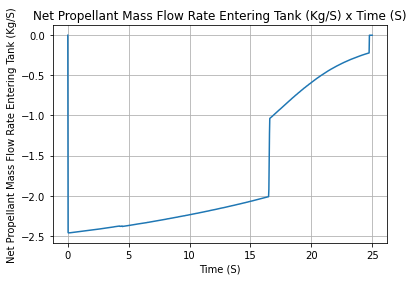

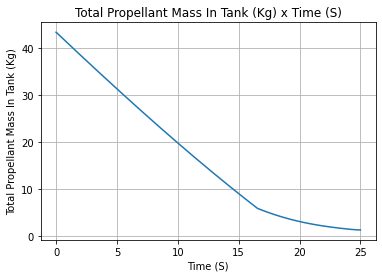

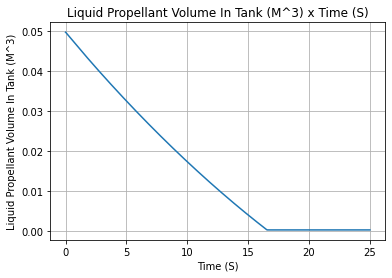

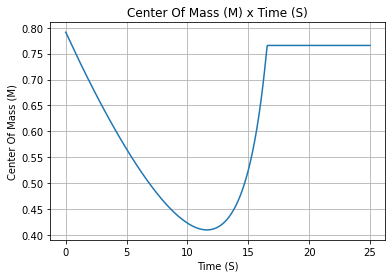

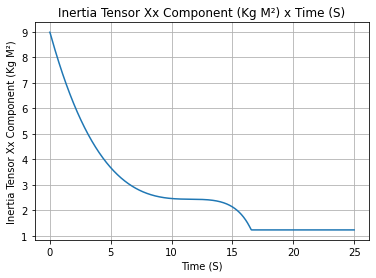

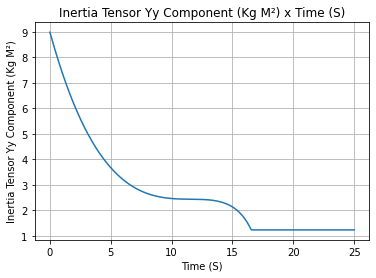

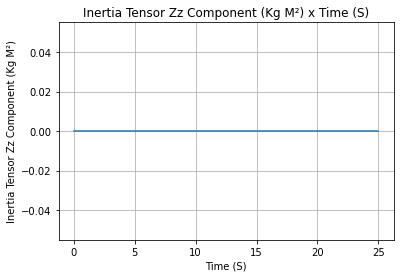

In [15]:
N2O_flow_tank.netMassFlowRate.plot(0, 25)
N2O_flow_tank.mass.plot(0, 25)
N2O_flow_tank.liquidVolume.plot(0, 25)
N2O_flow_tank.centerOfMass.plot(0, 25)
N2O_flow_tank.inertiaXX.plot(0, 25)
N2O_flow_tank.inertiaYY.plot(0, 25)
N2O_flow_tank.inertiaZZ.plot(0, 25)

In [16]:
ullage = N2O_flow_tank.volume - N2O_flow_tank.liquid_mass / LiquidN2O.density

N2O_ullage_tank = UllageBasedTank(
    name="Oxidizer Tank",
    diameter=0.2,
    height=1.6,
    bottomCap="flat",
    upperCap="flat",
    ullage=ullage,
    gas=VapourN2O,
    liquid=LiquidN2O,
)

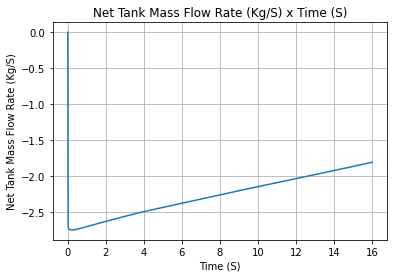

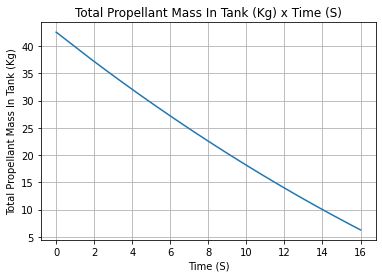

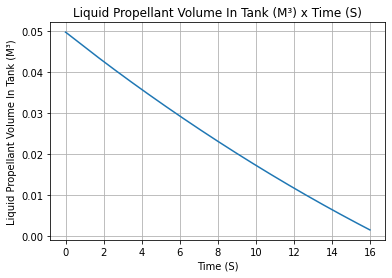

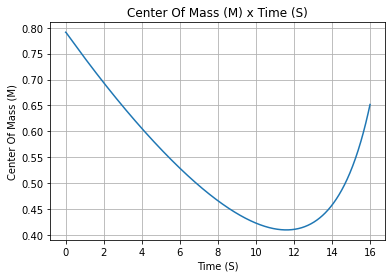

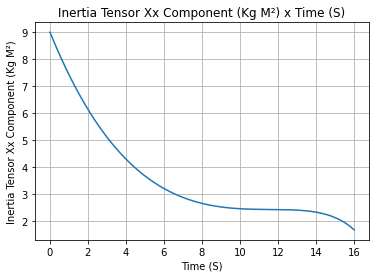

In [17]:
N2O_ullage_tank.netMassFlowRate.plot(0, 16)
N2O_ullage_tank.mass.plot(0, 16)
N2O_ullage_tank.liquidVolume.plot(0, 16)
N2O_ullage_tank.centerOfMass.plot(0, 16)
N2O_ullage_tank.inertiaXX.plot(0, 16)

In [18]:
gas_mass = N2O_flow_tank.gas_mass
liquid_mass = N2O_flow_tank.liquid_mass

N2O_mass_tank = MassBasedTank(
    name="Oxidizer Tank",
    diameter=0.2,
    height=1.6,
    bottomCap="flat",
    upperCap="flat",
    gas_mass=gas_mass,
    liquid_mass=liquid_mass,
    gas=VapourN2O,
    liquid=LiquidN2O,
)

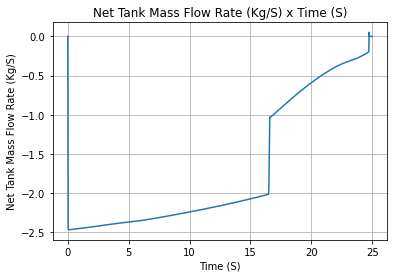

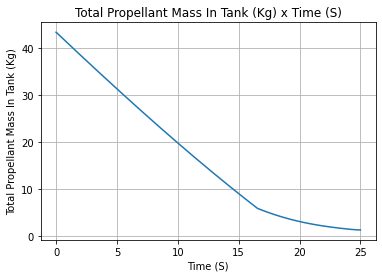

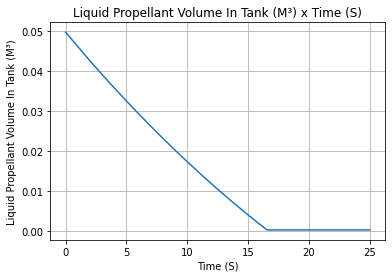

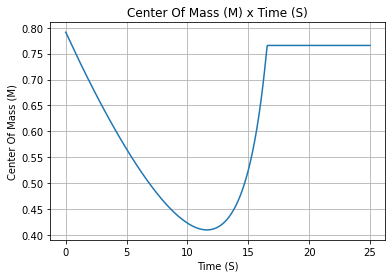

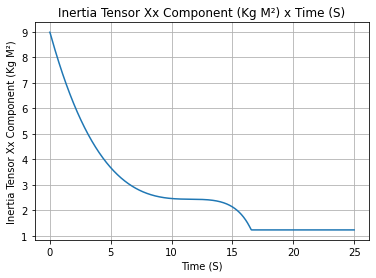

In [19]:
N2O_mass_tank.netMassFlowRate.plot(0, 25)
N2O_mass_tank.mass.plot(0, 25)
N2O_mass_tank.liquidVolume.plot(0, 25)
N2O_mass_tank.centerOfMass.plot(0, 25)
N2O_mass_tank.inertiaXX.plot(0, 25)

# Liquid Motors

In [35]:
NOELLE = LiquidMotor(
    thrustSource=1000,
    burnOut=25,
    nozzleRadius=0.05,
    nozzlePosition=0,
    throatRadius=0.02,
    reshapeThrustCurve=False,
    interpolationMethod="linear",
    coordinateSystemOrientation="nozzleToCombustionChamber"
)

In [40]:
NOELLE.addTank(N2O_mass_tank, 0)
NOELLE.addTank(N2O_mass_tank, -10)

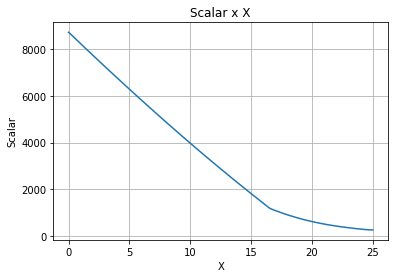

In [48]:
NOELLE.Ixx.plot(0, 25)

In [43]:
NOELLE.positioned_tanks

[{'tank': <rocketpy.motors.Tank.MassBasedTank at 0x1abb16fb130>,
  'position': 0},
 {'tank': <rocketpy.motors.Tank.MassBasedTank at 0x1abb16fb130>,
  'position': 0},
 {'tank': <rocketpy.motors.Tank.MassBasedTank at 0x1abb16fb130>,
  'position': 10},
 {'tank': <rocketpy.motors.Tank.MassBasedTank at 0x1abb16fb130>,
  'position': 0},
 {'tank': <rocketpy.motors.Tank.MassBasedTank at 0x1abb16fb130>,
  'position': -10}]